### Discrete vs kernel Fourier transform

- `discrete_fourier_transform(img, vis=False)`: direct FFT of the array (use for images).
- `fourier_transform(kernel, size)`: pads PSF to `size` and applies `ifftshift` so the kernel origin is at (0,0) before FFT (use for PSFs). This removes the linear phase ramp introduced by centered kernels.

The cell below visualizes the spectra and the spatial effect (reconstruction) for a centered impulse PSF.


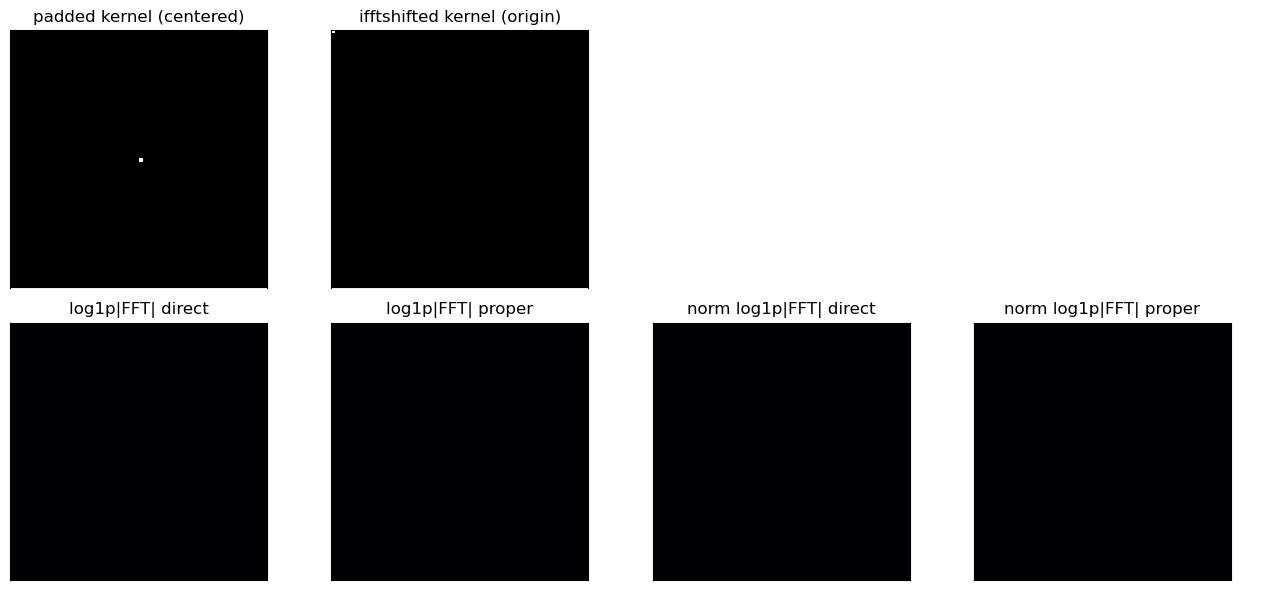

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from deconvolution import discrete_fourier_transform, fourier_transform, pad_kernel

size = (64, 64)

# centered impulse PSF (delta at center)
k = np.zeros((9, 9), dtype=np.float64)
k[4, 4] = 1.0

pad = pad_kernel(k, size)
unshift = np.fft.ifftshift(pad)

H_direct = discrete_fourier_transform(pad, vis=False)
H_proper = fourier_transform(k, size)

# Compute log1p magnitude values
mag_direct = np.log1p(np.abs(H_direct))
mag_proper = np.log1p(np.abs(H_proper))
phase_diff = np.angle(H_direct * np.conj(H_proper))

# Normalize log1p images for visualization
def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    if arr_max > arr_min:
        return (arr - arr_min) / (arr_max - arr_min)
    else:
        return arr

mag_direct_norm = normalize(mag_direct)
mag_proper_norm = normalize(mag_proper)

fig, axs = plt.subplots(2, 4, figsize=(13, 6))

# Show original padded and unshifted kernel
axs[0, 0].imshow(pad, cmap='gray')
axs[0, 0].set_title('padded kernel (centered)')
axs[0, 1].imshow(unshift, cmap='gray')
axs[0, 1].set_title('ifftshifted kernel (origin)')
axs[0, 2].axis('off')
axs[0, 3].axis('off')

# Show log1p values and their normalized versions
axs[1, 0].imshow(mag_direct, cmap='magma')
axs[1, 0].set_title('log1p|FFT| direct')
axs[1, 1].imshow(mag_proper, cmap='magma')
axs[1, 1].set_title('log1p|FFT| proper')
axs[1, 2].imshow(mag_direct_norm, cmap='magma')
axs[1, 2].set_title('norm log1p|FFT| direct')
axs[1, 3].imshow(mag_proper_norm, cmap='magma')
axs[1, 3].set_title('norm log1p|FFT| proper')

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
